In [1]:
# standard dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# load data and see whats inthere
chunksize = 10 ** 6
for chunk in pd.read_csv('train.csv', chunksize=chunksize, parse_dates=['pickup_datetime']):
     train = chunk
     break

#train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


Text(0,0.5,'n of records')

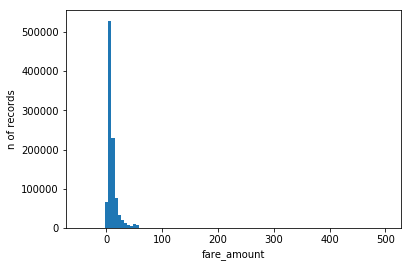

In [3]:
# quick look
plt.hist(train['fare_amount'].values, bins = 100)
plt.xlabel("fare_amount")
plt.ylabel('n of records')

In [4]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [5]:
# those should be obvious mistakes, and since the dataset is quite large, removal seems alright
train = train[(train['fare_amount'] > 0) & (train['passenger_count'] > 0)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996368.000000,996368.000000,996368.000000,996368.000000,996368.000000,996368.000000
mean,11.358160,-72.525955,39.928542,-72.527644,39.919709,1.690967
std,9.831082,12.066026,7.633386,11.328896,8.209539,1.322442
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000
25%,6.000000,-73.992060,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768128,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


C:\Users\pavel\Anaconda3\envs\MLAI6\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


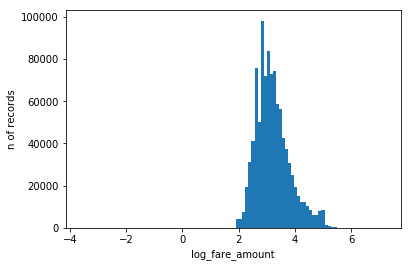

In [6]:
# log - different view if the price paid
#train.dropna(inplace=True)
train['log_fair_amount'] = np.log(train['fare_amount']) + 1

plt.hist(train['log_fair_amount'].values, bins = 100)
plt.xlabel("log_fare_amount")
plt.ylabel('n of records')
plt.show()

Text(0,0.5,'n of records')

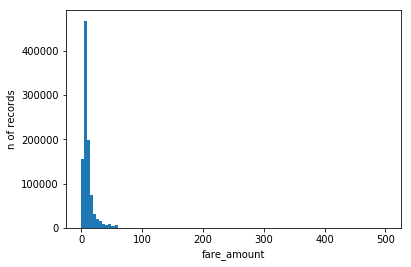

In [7]:
plt.hist(train['fare_amount'].values, bins = 100)
plt.xlabel("fare_amount")
plt.ylabel('n of records')

Text(0,0.5,'number of records')

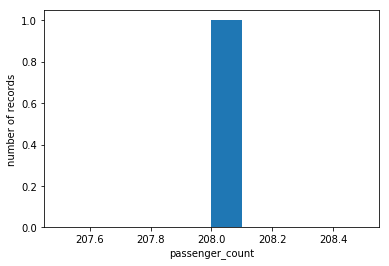

In [8]:
plt.hist(train.loc[train['passenger_count'] > 6,'passenger_count'].values)
plt.xlabel('passenger_count')
plt.ylabel('number of records')

In [9]:
train = train[train['passenger_count'] < 6]

In [10]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000
mean,11.338706,-72.524155,39.928774,-72.528042,39.921227,1.597100,3.213933
std,9.821863,12.079817,7.648459,11.320461,8.232060,1.153622,0.601504
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992062,40.734950,-73.991384,40.734057,1.000000,2.791759
50%,8.500000,-73.981794,40.752692,-73.980137,40.753168,1.000000,3.140066
75%,12.500000,-73.967100,40.767146,-73.963660,40.768127,2.000000,3.525729
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,5.000000,7.214608


In [11]:
train = train[(train['pickup_longitude'] <= -70) & (train['dropoff_longitude'] >= -75)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000
mean,11.326327,-73.982928,40.752184,-73.908013,40.718451,1.597216,3.213833
std,9.763111,2.474787,0.946627,2.208313,3.914893,1.153433,0.600367
min,0.010000,-1452.988333,0.000000,-74.996513,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992275,40.736551,-73.991563,40.735507,1.000000,2.791759
50%,8.500000,-73.982084,40.753402,-73.980570,40.753842,1.000000,3.140066
75%,12.500000,-73.968315,40.767569,-73.965244,40.768405,2.000000,3.525729
max,500.000000,-70.140793,424.083332,45.581619,1651.553433,5.000000,7.214608


In [12]:
train = train[(train['pickup_latitude'] >= -35) & (train['dropoff_latitude'] <= 45)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000
mean,11.326278,-73.982927,40.752180,-73.908203,40.714399,1.597217,3.213828
std,9.763116,2.474802,0.946622,2.205475,3.432063,1.153432,0.600366
min,0.010000,-1452.988333,0.000000,-74.996513,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992275,40.736551,-73.991563,40.735507,1.000000,2.791759
50%,8.500000,-73.982084,40.753402,-73.980571,40.753842,1.000000,3.140066
75%,12.500000,-73.968315,40.767569,-73.965244,40.768405,2.000000,3.525729
max,500.000000,-70.140793,424.083332,45.581619,44.600000,5.000000,7.214608


In [13]:
train['abs_longtitude_diff'] = (train['pickup_longitude'] - train['dropoff_longitude']).abs()
train['abs_latitude_diff'] = (train['pickup_latitude'] - train['dropoff_latitude']).abs()
train = train[(train['abs_longtitude_diff'] <= 1) & (train['abs_latitude_diff'] <= 1)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount,abs_longtitude_diff,abs_latitude_diff
count,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000
mean,11.320696,-73.975100,40.751016,-73.974205,40.751355,1.597361,3.213752,0.022788,0.021321
std,9.733378,0.040907,0.031883,0.040145,0.034900,1.153569,0.599862,0.035241,0.024233
min,0.010000,-75.034685,38.689556,-74.996513,38.684359,1.000000,-3.605170,0.000000,0.000000
25%,6.000000,-73.992275,40.736559,-73.991573,40.735585,1.000000,2.791759,0.006125,0.006927
50%,8.500000,-73.982085,40.753407,-73.980593,40.753876,1.000000,3.140066,0.012695,0.014154
75%,12.500000,-73.968320,40.767571,-73.965326,40.768417,2.000000,3.525729,0.023911,0.027173
max,500.000000,-70.257668,43.098708,-70.050500,43.415190,5.000000,7.214608,0.939292,0.880962


In [14]:
(train.loc[:,['fare_amount', 'passenger_count', 'abs_longtitude_diff', 'abs_latitude_diff']]).corr()

,fare_amount,passenger_count,abs_longtitude_diff,abs_latitude_diff
fare_amount,1.000000,0.006968,0.767909,0.634668
passenger_count,0.006968,1.000000,0.007082,0.007277
abs_longtitude_diff,0.767909,0.007082,1.000000,0.574688
abs_latitude_diff,0.634668,0.007277,0.574688,1.000000


In [15]:
featues = list(train.columns)
features = ['fare_amount', 'abs_longtitude_diff', 'abs_latitude_diff']
X = train[features]
y = X.pop('fare_amount')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6464711771315803

In [17]:
# todo: add datetimeinfo
# https://www.quora.com/What-times-are-considered-rush-hour-in-New-York-City
# hour histo

In [18]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'log_fair_amount', 'abs_longtitude_diff',
       'abs_latitude_diff'],
      dtype='object')

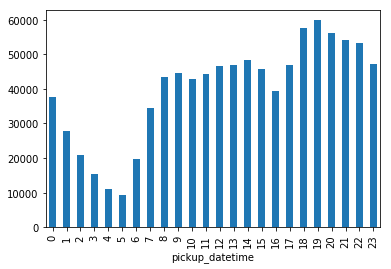

In [19]:
train.groupby([ train["pickup_datetime"].dt.hour])['pickup_datetime'].count().plot(kind="bar")

In [20]:
# create "rush-hours coeficient"
train['hour'] = train["pickup_datetime"].dt.hour
train['year'] = train["pickup_datetime"].dt.year
train['rush'] = np.where(train["pickup_datetime"].dt.hour <= 7, 1, np.where(train["pickup_datetime"].dt.hour <= 17, 2,3))

In [21]:
train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount,abs_longtitude_diff,abs_latitude_diff,hour,year,rush
fare_amount,1.000000,0.355634,-0.173445,0.271789,-0.144056,0.006968,0.892713,0.767909,0.634668,-0.019461,0.115908,-0.031730
pickup_longitude,0.355634,1.000000,0.159060,0.464185,0.160494,-0.001366,0.269476,0.451423,0.257613,0.016865,0.001517,0.004328
pickup_latitude,-0.173445,0.159060,1.000000,0.179934,0.535984,-0.007835,-0.146864,-0.129984,-0.112478,0.025754,-0.017583,0.021856
dropoff_longitude,0.271789,0.464185,0.179934,1.000000,0.243935,-0.001821,0.241010,0.348360,0.192583,-0.039415,-0.001198,-0.053404
dropoff_latitude,-0.144056,0.160494,0.535984,0.243935,1.000000,-0.004682,-0.132230,-0.102974,-0.091673,0.017842,-0.009905,0.010559
passenger_count,0.006968,-0.001366,-0.007835,-0.001821,-0.004682,1.000000,0.009821,0.007082,0.007277,0.019983,-0.048649,0.020044
log_fair_amount,0.892713,0.269476,-0.146864,0.241010,-0.132230,0.009821,1.000000,0.675722,0.653603,-0.015466,0.142383,-0.021160
abs_longtitude_diff,0.767909,0.451423,-0.129984,0.348360,-0.102974,0.007082,0.675722,1.000000,0.574688,-0.028461,0.021700,-0.043663
abs_latitude_diff,0.634668,0.257613,-0.112478,0.192583,-0.091673,0.007277,0.653603,0.574688,1.000000,-0.022256,0.011341,-0.027947
hour,-0.019461,0.016865,0.025754,-0.039415,0.017842,0.019983,-0.015466,-0.028461,-0.022256,1.000000,0.002341,0.923780


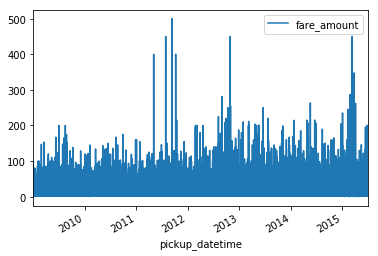

In [22]:
train.plot("pickup_datetime", y='fare_amount')

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['year_standardized'] = scaler.fit_transform(train["pickup_datetime"].dt.year.values.reshape(-1, 1))

C:\Users\pavel\Anaconda3\envs\MLAI6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
train['year_standardized']

0        -1.453703
1        -0.917901
2        -0.382099
3         0.153703
4        -0.917901
5        -0.382099
6         0.153703
7         0.153703
8         0.153703
9        -1.453703
10        0.153703
12       -1.453703
13        0.689505
14       -0.382099
16        1.225307
17       -1.453703
18       -0.917901
19        1.225307
20       -0.917901
21        0.689505
22       -1.453703
23       -0.917901
24       -1.453703
25       -0.382099
27       -0.382099
28        0.153703
29        0.689505
30        1.225307
31        1.761109
32       -1.453703
            ...   
999969    0.689505
999970    0.689505
999971   -1.453703
999972   -1.453703
999973   -0.382099
999974    0.689505
999975    1.225307
999976   -0.382099
999978    0.153703
999979    0.689505
999980    1.225307
999981    1.761109
999982   -0.382099
999983    1.225307
999984    1.225307
999985    1.225307
999986    1.761109
999987   -0.917901
999988   -0.382099
999989    0.153703
999990   -1.453703
999991   -0.

In [25]:
featues = list(train.columns)
features = ['fare_amount', 'abs_longtitude_diff', 'abs_latitude_diff', 'year_standardized']
X = train[features]
y = X.pop('fare_amount')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.6569382029214752

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.747984576375741

In [ ]:
#too slow
#from sklearn.svm import SVR
#model = SVR()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [31]:
from sklearn.ensemble import BaggingRegressor
ensemble_model = BaggingRegressor(tree_model)
ensemble_model.fit(X_train, y_train)
ensemble_model.score(X_test, y_test)

0.7510898830424876

In [62]:
to_predict = pd.read_csv('test.csv', parse_dates=['pickup_datetime'])

In [63]:
to_predict.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [64]:
X_train.head()

,abs_longtitude_diff,abs_latitude_diff,year_standardized
795070,0.006742,0.023665,0.689505
452319,0.011000,0.025100,-0.382099
361104,0.009246,0.002475,-1.453703
730193,0.046616,0.046370,0.689505
492149,0.002405,0.016875,-0.382099


In [65]:
to_predict['abs_longtitude_diff'] = (to_predict['pickup_longitude'] - to_predict['dropoff_longitude']).abs()
to_predict['abs_latitude_diff'] = (to_predict['pickup_latitude'] - to_predict['dropoff_latitude']).abs()

In [66]:

to_predict['year_standardized'] = scaler.fit_transform(to_predict["pickup_datetime"].dt.year.values.reshape(-1, 1))
to_predict.drop(["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"], axis=1, inplace=True)
to_predict.head()

C:\Users\pavel\Anaconda3\envs\MLAI6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,key,abs_longtitude_diff,abs_latitude_diff,year_standardized
0,2015-01-27 13:08:24.0000002,0.008110,0.019970,1.765797
1,2015-01-27 13:08:24.0000003,0.012024,0.019817,1.765797
2,2011-10-08 11:53:44.0000002,0.002870,0.005121,-0.452413
3,2012-12-01 21:12:12.0000002,0.009288,0.016172,0.102140
4,2012-12-01 21:12:12.0000003,0.022519,0.045348,0.102140
5,2012-12-01 21:12:12.0000005,0.018194,0.025494,0.102140
6,2011-10-06 12:10:20.0000001,0.010609,0.002311,-0.452413
7,2011-10-06 12:10:20.0000003,0.207801,0.112732,-0.452413
8,2011-10-06 12:10:20.0000002,0.018993,0.031727,-0.452413
9,2014-02-18 15:22:20.0000002,0.011104,0.005206,1.211244


In [69]:
key = to_predict.pop('key')
predictions = ensemble_model.predict(to_predict)

In [71]:
to_submit = pd.DataFrame({'key': key, 'fare_amount': predictions},
    columns = ['key', 'fare_amount'])

In [73]:
to_submit.to_csv("submission.csv", index=False)
to_submit.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.530430
1,2015-01-27 13:08:24.0000003,9.530430
2,2011-10-08 11:53:44.0000002,6.739033
3,2012-12-01 21:12:12.0000002,6.739033
4,2012-12-01 21:12:12.0000003,14.007458
